In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("All libraries imported successfully!")


All libraries imported successfully!


In [5]:
pwd

'C:\\Users\\Zielesa Patrick'

In [6]:
# Read csv file
df = pd.read_csv('train.csv')

## DATA CLEANING


In [10]:
#checking for Nullvalues
df.isnull().sum()/len(df)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

**Here, Product_Category_2 has 31.5% missing data whereas Product_Category_3 has almost 70% missing data. Since the % of missing values in Product_Category_3 is very high, it would be wise to drop this column. In case of Product_Category_2, we shall try to fill the missing values as it is one of the important features.**

In [112]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969


In [18]:
#drop product_category_3
df.drop(columns=['Product_Category_3'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [22]:
#impute Product_Category_2
df['Product_Category_2'].fillna(df['Product_Category_2'].mean())


0          9.842329
1          6.000000
2          9.842329
3         14.000000
4          9.842329
            ...    
550063     9.842329
550064     9.842329
550065     9.842329
550066     9.842329
550067     9.842329
Name: Product_Category_2, Length: 550068, dtype: float64

In [35]:
 #check_for dublicates
df.duplicated().sum()

np.int64(0)

In [42]:
#check for unique values
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Purchase                      18105
dtype: int64

### Check for Outliers

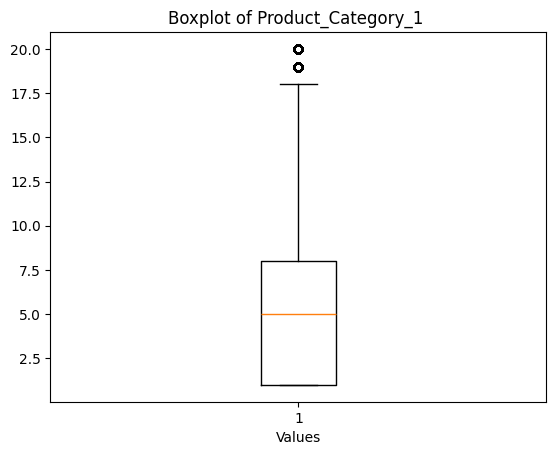

In [48]:
#check for outliers column=Product_Category_1

plt.boxplot(df['Product_Category_1'], vert=True)
plt.title('Boxplot of Product_Category_1 ')
plt.xlabel('Values')
plt.show()



In [51]:
#remove outliers in product_catergory_1
index1=df[df['Product_Category_1']>17.5].index
df.drop(index1,inplace=True)


# DATA ANALYSIS

In [53]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.427900e+05,542790.000000,542790.000000,542790.000000,542790.000000,542790.000000
mean,1.003028e+06,8.074274,0.409230,5.223031,9.842329,9369.219101
std,1.727819e+03,6.524078,0.491692,3.634354,4.235968,4970.349471
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,185.000000
25%,1.001514e+06,2.000000,0.000000,1.000000,8.000000,5897.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.842329,8072.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12086.000000
max,1.006040e+06,20.000000,1.000000,17.000000,18.000000,23961.000000


### Purchase amount by gender

In [111]:
mean_purchase_amount_by_gender=df.groupby('Gender')['Purchase'].mean()
mean_purchase_amount_by_gender

Gender
F    8825.566959
M    9547.873497
Name: Purchase, dtype: float64

<Axes: title={'center': 'Mean Purchase Amount by Gender '}, xlabel='Gender', ylabel='Purchase'>

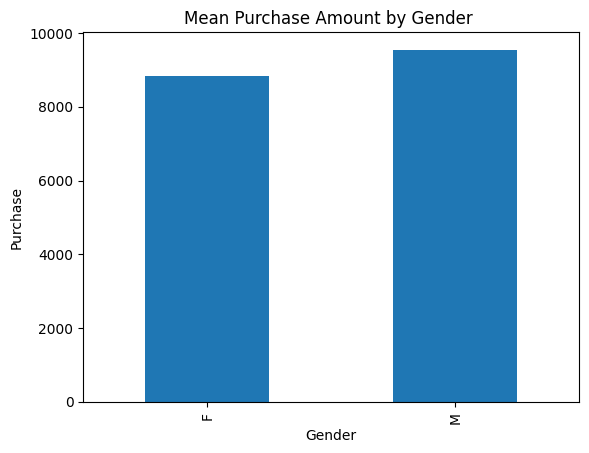

In [57]:
mean_purchase_amount_by_gender.plot(
    kind='bar',
    xlabel='Gender',
    ylabel='Purchase',
    title='Mean Purchase Amount by Gender '
)

**Males appears to spend more**

## Purchase by Marital Status

In [59]:
mean_purchase_amount_by_Marital_Status=df.groupby('Marital_Status')['Purchase'].mean()
mean_purchase_amount_by_Marital_Status

Marital_Status
0    9366.269023
1    9373.477873
Name: Purchase, dtype: float64

<Axes: title={'center': 'Mean Purchase Amount by Gender '}, xlabel='Marital Status', ylabel='Purchase'>

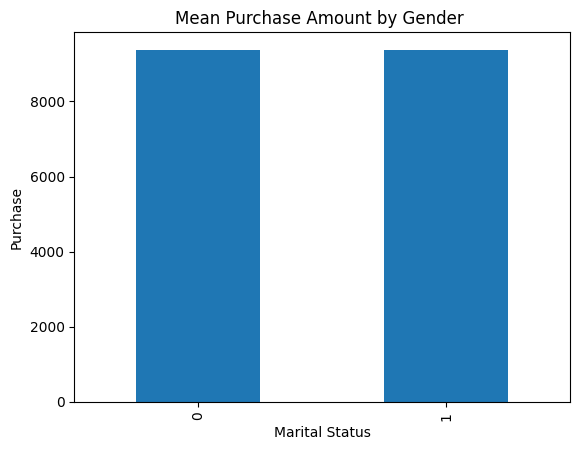

In [61]:
mean_purchase_amount_by_Marital_Status.plot(
    kind='bar',
    xlabel='Marital Status',
    ylabel='Purchase',
    title='Mean Purchase Amount by Gender '
)

**Marital Status does not seem to affect Purchase**

In [71]:
mean_purchase_amount_by_Occupation=df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=True)
mean_purchase_amount_by_Occupation

Occupation
9     8743.132291
19    8791.058922
20    8915.954723
2     9047.823785
1     9050.448238
10    9062.646151
0     9224.496079
3     9272.907083
18    9287.931431
4     9301.833900
11    9353.684363
6     9357.671127
5     9443.776972
13    9475.499736
16    9505.930128
7     9549.515117
14    9611.739440
8     9616.699346
15    9906.713701
12    9913.967590
17    9944.659311
Name: Purchase, dtype: float64

<Axes: title={'center': 'Mean Purchase Amount by Gender '}, xlabel='Occupation', ylabel='Purchase'>

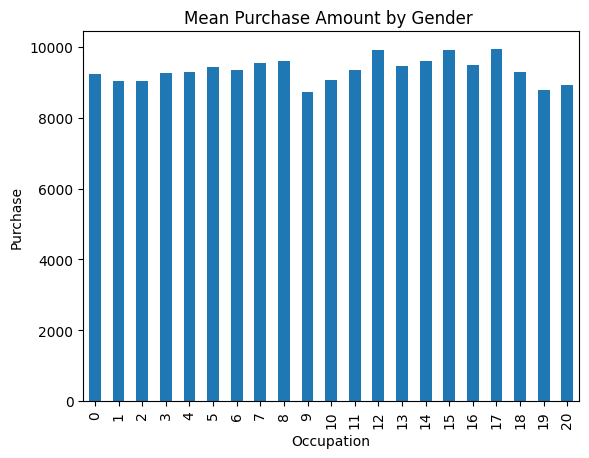

In [65]:
mean_purchase_amount_by_occupation.plot(
    kind='bar',
    xlabel='Occupation',
    ylabel='Purchase',
    title='Mean Purchase Amount by Gender '
)

**The purchase amount of Occupation 9 and 19 is lower compared to the remaining 19 Occupations**

In [72]:
mean_purchase_amount_by_Marital_Product_Category_1=df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=True)
mean_purchase_amount_by_Marital_Product_Category_1

Product_Category_1
13      722.400613
12     1350.859894
4      2329.659491
11     4685.268456
5      6240.088178
8      7498.958078
3     10096.705734
17    10170.759516
2     11251.935384
14    13141.625739
1     13606.218596
16    14766.037037
15    14780.451828
9     15537.375610
6     15838.478550
7     16365.689600
10    19675.570927
Name: Purchase, dtype: float64

Text(0, 0.5, 'Purchase')

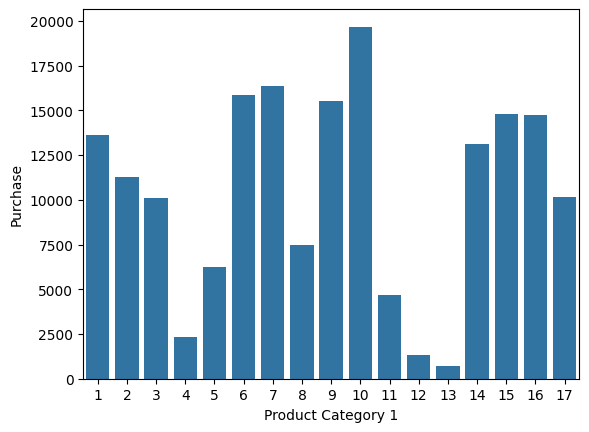

In [73]:
sns.barplot(x=mean_purchase_amount_by_Marital_Product_Category_1.index,y=mean_purchase_amount_by_Marital_Product_Category_1)
plt.xlabel("Product Category 1")
plt.ylabel("Purchase")

* **Product 10 in Product Category 1 has the maximum purchase amount, which is also significantly higher compared to the other products in this category**.
* **Product 13 in Product Category 1 has the minimum purchase amount, which is also significantly lower compared to the other products in this category**.
* **Product 4 and 12 in Product Category 1 also have significantly lower purchase amount compared to other products**.

In [108]:
mean_purchase_amount_by_Product_Category_2=df.groupby('Product_Category_2')['Purchase'].mean().round(0)
mean_purchase_amount_by_Product_Category_2

Product_Category_2
2.000000     13619.0
3.000000     11235.0
4.000000     10215.0
5.000000      9028.0
6.000000     11504.0
7.000000      6885.0
8.000000     10273.0
9.000000      7277.0
9.842329      7786.0
10.000000    15649.0
11.000000     8941.0
12.000000     6975.0
13.000000     9683.0
14.000000     7105.0
15.000000    10357.0
16.000000    10296.0
17.000000     9422.0
18.000000     9352.0
Name: Purchase, dtype: float64

<Axes: title={'center': 'Mean Purchase Amount by Gender '}, xlabel='Product_Category_2', ylabel='Purchase'>

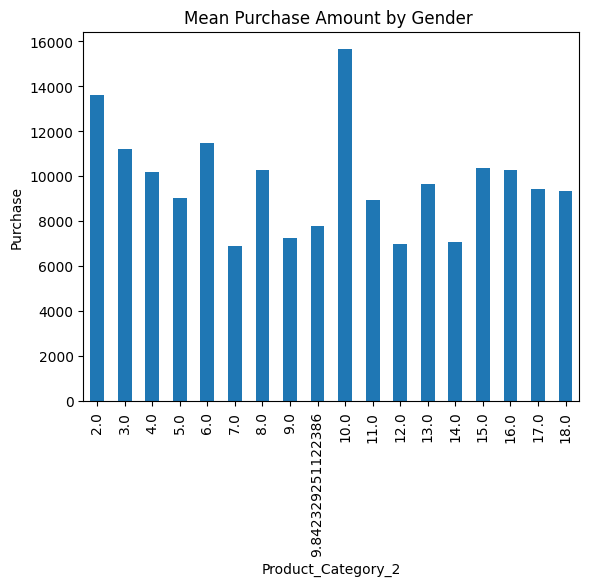

In [109]:
mean_purchase_amount_by_Product_Category_2.plot(
    kind='bar',
    xlabel='Product_Category_2',
    ylabel='Purchase',
    title='Mean Purchase Amount by Gender '
)

* **Product 10 in Product Category 2 has the maximum purchase amount, which is also significantly higher compared to the other products in this category**.
* **Product 7 in Product Category 2 has lower purchase amount compared to other products**

mean_purchase_amount_by_Stay_In_Current_City_Years=df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().round(0)
mean_purchase_amount_by_Stay_In_Current_City_Years

<Axes: title={'center': 'Mean Purchase in year'}, xlabel='In years', ylabel='Purchase'>

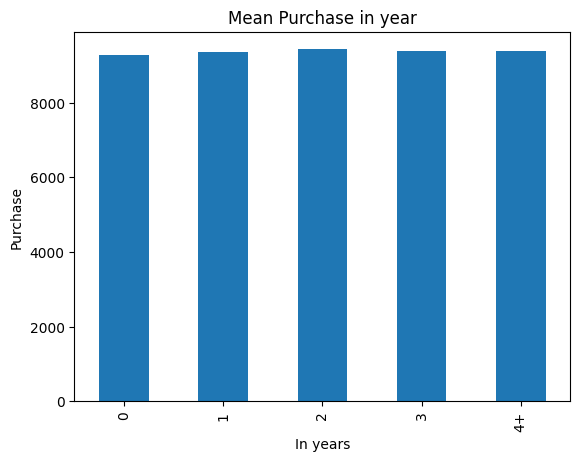

In [117]:
mean_purchase_amount_by_Stay_In_Current_City_Years.plot(
    kind='bar',
    xlabel='In years',
    ylabel='Purchase',
    title='Mean Purchase in year'
)

**Number of years of Stay in Current City does not affect the purchase amount**

Text(0.5, 1.0, 'Distribution of purchase')

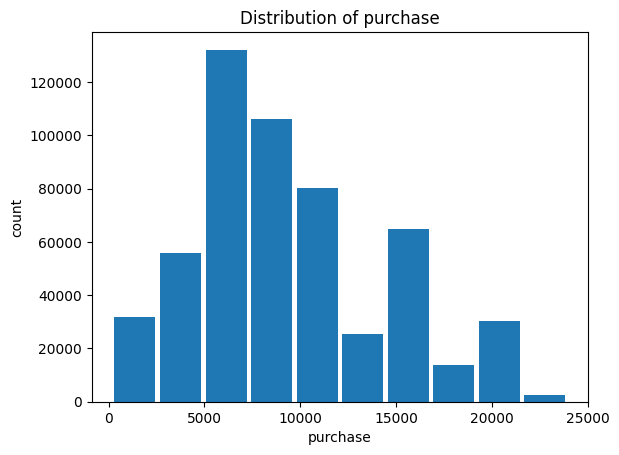

In [103]:
plt.hist(df['Purchase'], rwidth=0.9)
plt.xlabel('purchase')
plt.ylabel('count')
plt.title('Distribution of purchase')

**No specific distribution is portrayed in the Purchase column.**